In [1]:
import qiskit
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram,plot_distribution
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
from qiskit_aer import Aer, AerSimulator
from qiskit.circuit.library import UGate
from qiskit.quantum_info import Statevector
import pylatexenc
import numpy as np
import math

In [2]:
def build_circuit(eps, troter_steps):
    # DEFINE VARIABLES
    w0,u0,w1,u1 = 0.90,1,1.35,math.sqrt(2)
    theta_1 = (w0 * u0 * eps)
    theta_2 = (w0 * u1 * eps)
    theta_3 = (w1 * u0 * eps)
    theta_4 = (w1 * u1 * eps)
    print(theta_1, theta_2, theta_3, theta_4)
    # FOR TROTTERIZATION
    dtheta_1 = theta_1 / troter_steps
    dtheta_2 = theta_2 / troter_steps
    dtheta_3 = theta_3 / troter_steps
    dtheta_4 = theta_4 / troter_steps
    b0 = QuantumRegister(1, "b0")
    b1 = QuantumRegister(1,"b1")
    b2 = QuantumRegister(1,"b2")

    a0 = QuantumRegister(1, "a0")
    a1 = QuantumRegister(1,"a1")
    a2 = QuantumRegister(1,"a2")
    creg = ClassicalRegister(6,name = "measurement")
    quantum_circuit = QuantumCircuit(b0,a0,b1,a1,b2,a2,creg)
    # INITIAL STATE 001001
    quantum_circuit.x(b1)
    quantum_circuit.x(a2)
    # FIRST BLOCK H00
    # STRING 1
    for _ in range(troter_steps):
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2, b0)

        quantum_circuit.p(dtheta_1,b0)

        quantum_circuit.rx(-np.pi/2, b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        # barrier
        quantum_circuit.barrier(label = "1.2")
        # STRING 2
        quantum_circuit.s(a1)
        quantum_circuit.s(a0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2, b0)

        quantum_circuit.p(dtheta_1,b0)

        quantum_circuit.rx(-np.pi/2, b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(a0)
        quantum_circuit.sdg(a1)
        # barrier
        quantum_circuit.barrier(label = "2.3")
        # STRING 3
        quantum_circuit.s(b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2,b0)

        quantum_circuit.p(dtheta_1, b0)

        quantum_circuit.rx(-np.pi/2,b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.sdg(b1)
        # barrier
        quantum_circuit.barrier(label = "3.4")
        # STRING 4
        quantum_circuit.s(a1)
        quantum_circuit.s(b1)
        quantum_circuit.s(a0)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2,b0)

        quantum_circuit.p(dtheta_1, b0)

        quantum_circuit.rx(-np.pi/2,b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.sdg(a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(a1)
        # Barrier
        quantum_circuit.barrier(label = "BLOCK 2")
        # BLOCK 2
        # STRING 1
        quantum_circuit.cx(b0,a2)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2, b0)

        quantum_circuit.p(dtheta_2,b0)

        quantum_circuit.rx(-np.pi/2, b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a2)
        # BARRIER
        quantum_circuit.barrier(label = "1.2")
        # STRING 2
        quantum_circuit.s(a2)
        quantum_circuit.s(a1)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2, b0)

        quantum_circuit.p(dtheta_2,b0)

        quantum_circuit.rx(-np.pi/2, b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.sdg(a1)
        quantum_circuit.sdg(a2)
        # BARRIER 
        quantum_circuit.barrier(label = "2.3")
        # STRING 3
        quantum_circuit.s(b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2,b0)

        quantum_circuit.p(dtheta_2, b0)

        quantum_circuit.rx(-np.pi/2,b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.sdg(b0)
        quantum_circuit.sdg(b1)
        # BARRIER 
        quantum_circuit.barrier(label = "3.4")
        # STRING 4
        quantum_circuit.s(a2)
        quantum_circuit.s(b1)
        quantum_circuit.s(a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2,b0)

        quantum_circuit.p(dtheta_2, b0)

        quantum_circuit.rx(-np.pi/2,b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.sdg(b0)
        quantum_circuit.sdg(a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(a2)
        # BARRIER
        quantum_circuit.barrier(label = "Block 3")
        # BLOCK 3
        # STRING 1
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2, b1)

        quantum_circuit.p(dtheta_3,b1)

        quantum_circuit.rx(-np.pi/2, b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        # barrier
        quantum_circuit.barrier(label = "1.2")
        # STRING 2
        quantum_circuit.s(a1)
        quantum_circuit.s(a0)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2, b1)

        quantum_circuit.p(dtheta_3,b1)

        quantum_circuit.rx(-np.pi/2, b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(a0)
        quantum_circuit.sdg(a1)
        # barrier
        quantum_circuit.barrier(label = "2.3")
        # STRING 3
        quantum_circuit.s(b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2,b1)

        quantum_circuit.p(dtheta_3, b1)

        quantum_circuit.rx(-np.pi/2,b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(b2)
        # barrier
        quantum_circuit.barrier(label = "3.4")
        # STRING 4
        quantum_circuit.s(a1)
        quantum_circuit.s(b2)
        quantum_circuit.s(a0)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2,b1)

        quantum_circuit.p(dtheta_3, b1)

        quantum_circuit.rx(-np.pi/2,b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(a0)
        quantum_circuit.sdg(b2)
        quantum_circuit.sdg(a1)
        # Barrier 
        quantum_circuit.barrier(label = "Block 4")
        # BLOCK 4
        # STRING 1
        quantum_circuit.cx(b1,a2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2, b1)

        quantum_circuit.p(dtheta_4,b1)

        quantum_circuit.rx(-np.pi/2, b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a2)
        # barrier
        quantum_circuit.barrier(label = "1.2")
        # STRING 2
        quantum_circuit.s(a2)
        quantum_circuit.s(a1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2, b1)

        quantum_circuit.p(dtheta_4,b1)

        quantum_circuit.rx(-np.pi/2, b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.sdg(a1)
        quantum_circuit.sdg(a2)
        # barrier
        quantum_circuit.barrier(label = "2.3")
        # STRING 3
        quantum_circuit.s(b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2,b1)

        quantum_circuit.p(dtheta_4, b1)

        quantum_circuit.rx(-np.pi/2,b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(b2)
        # barrier
        quantum_circuit.barrier(label = "3.4")
        # STRING 4
        quantum_circuit.s(a2)
        quantum_circuit.s(b2)
        quantum_circuit.s(a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2,b1)

        quantum_circuit.p(dtheta_4, b1)

        quantum_circuit.rx(-np.pi/2,b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(a1)
        quantum_circuit.sdg(b2)
        quantum_circuit.sdg(a2)
        # quantum_circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
        # quantum_circuit.draw("mpl", fold = 51)
    return quantum_circuit
eps_list = [math.pow(10,-2), math.pow(10,-3), math.pow(10,-4), math.pow(10,-5), math.pow(10,-6)]
troter_steps = 10
psi_exact_ls = []
meas_counts_ls = []
for eps in eps_list:
    # EXACT STATE
    quantum_circuit = build_circuit(eps, troter_steps)
    print("Running for epsilon =", eps)
    # compute exact state
    psi_exact = Statevector.from_instruction(quantum_circuit)
    psi_exact_ls.append(psi_exact)
    print(psi_exact_ls)
    # CREATE COPY OF THE STATE AND PERFORM MEASURMENTS
    meas = quantum_circuit.copy()

    meas.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
    backend = AerSimulator()
    pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=3)
    transpiled_circuit = pass_manager.run(meas) #quantum_circuit

    sampler = Sampler(mode=backend)
    job_result = sampler.run([transpiled_circuit], shots=1024).result()
    counts = job_result[0].data.measurement.get_counts()
    # Note: The exact access pattern may vary with Qiskit version;
    # sometimes it's .data.c or .data.meas — adjust accordingly based on your transpiled circuit.
    meas_counts_ls.append(counts)
    print(meas_counts_ls)
    # plot_distribution(counts)

0.009000000000000001 0.012727922061357857 0.013500000000000002 0.019091883092036785
Running for epsilon = 0.01
[Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -6.66015822e-04-7.26417106e-05j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -2.75883593e-03+2.52943985e-02j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              

In [3]:
shots = 1024   # same number used in simulation

fidelity_list = []

for psi_exact, counts in zip(psi_exact_ls, meas_counts_ls):

    # exact probability distribution
    exact_probs = psi_exact.probabilities_dict()

    fidelity = 0

    for bitstring, count in counts.items():

        p_meas = count / shots
        p_exact = exact_probs.get(bitstring, 0)

        fidelity += p_meas * p_exact

    fidelity_list.append(fidelity)

print("Fidelity values:")
print(fidelity_list)

Fidelity values:
[np.float64(0.9978956638709929), np.float64(0.9999789401664917), np.float64(0.9999997894000576), np.float64(0.9999999978940373), np.float64(0.9999999999789875)]


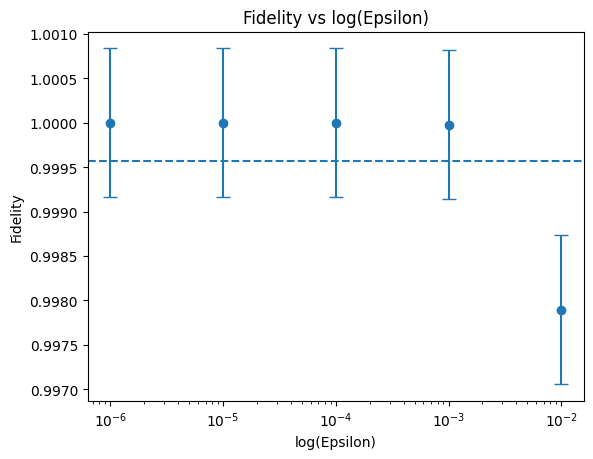

In [4]:
import numpy as np
import matplotlib.pyplot as plt

eps = np.array(eps_list)
fidelities = np.array(fidelity_list)

avg_fidelity = np.mean(fidelities)
std_fidelity = np.std(fidelities)

plt.figure()

plt.errorbar(eps, fidelities, yerr=std_fidelity, fmt='o', capsize=5)

plt.axhline(avg_fidelity, linestyle='--')

plt.xscale('log')   # <-- log scale on x-axis

plt.xlabel("log(Epsilon)")
plt.ylabel("Fidelity")
plt.title("Fidelity vs log(Epsilon)")

plt.show()


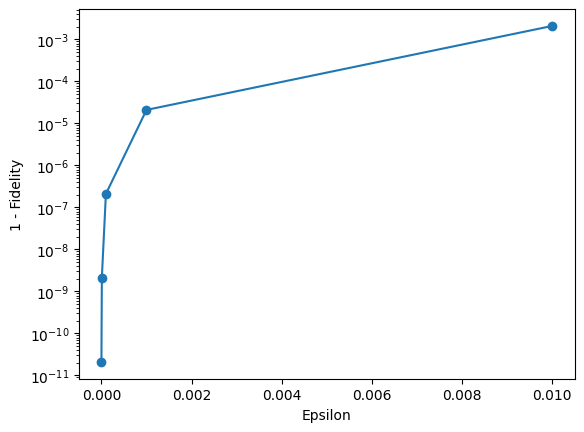

In [5]:
error = 1 - np.array(fidelity_list)

plt.figure()
plt.plot(eps_list, error, 'o-')
plt.yscale('log')
plt.xlabel("Epsilon")
plt.ylabel("1 - Fidelity")
plt.show()